In [5]:

import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stats

from docutils.parsers.rst.directives.tables import RSTTable

In [6]:
#IMPORTAR DADOS 
dataset = pd.read_csv("C:/Users/renat/OneDrive/Documentos/Cursos/CursoUdemyDados/Curso_udemy/FormacaoCD/todos os arquivos/10.Prática em Python/dados/Churn.csv", sep=";")
#visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
#para virificar o tamanho do arquivo 
dataset.shape

(999, 12)

In [8]:
#primeiro problema é o dataframe (ali em cima) tem colunas com nomes em X, precisamos resolver isso dando nomes as colunas 
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]   

In [9]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [10]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

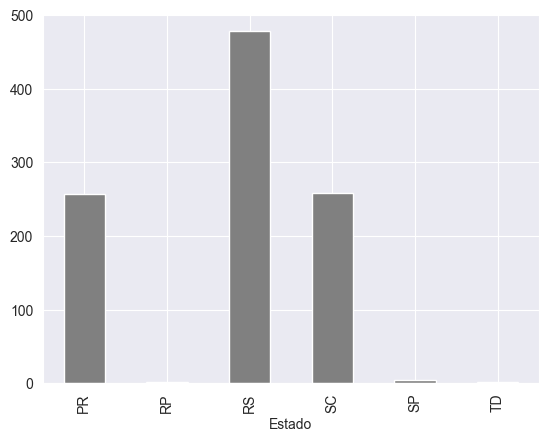

In [11]:
agrupado.plot.bar(color = 'gray')

In [12]:
#Genero
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

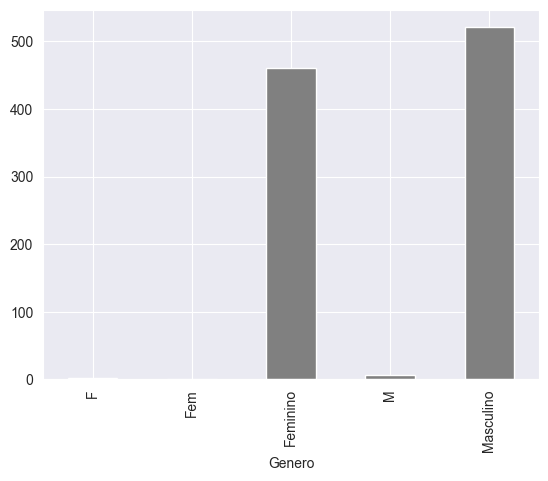

In [13]:
agrupado.plot.bar(color = 'gray')

In [14]:
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

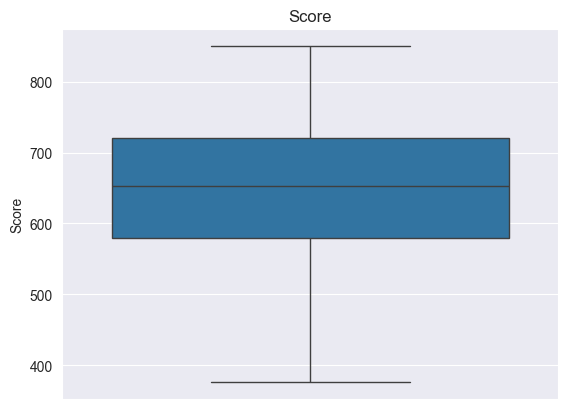

In [16]:
sns.boxplot(dataset['Score']).set_title('Score')


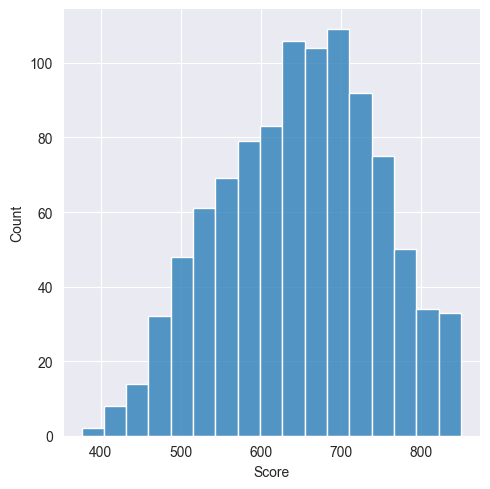

In [17]:
sns.displot(dataset['Score']).set_titles('Score')

In [18]:
#idade - dois erros -20 e 140 de max
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

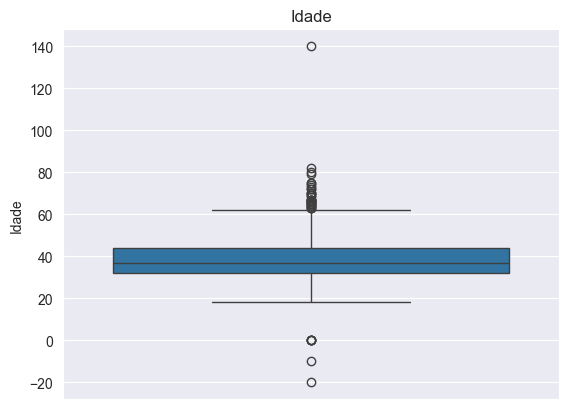

In [19]:
sns.boxplot(dataset['Idade']).set_title('Idade')

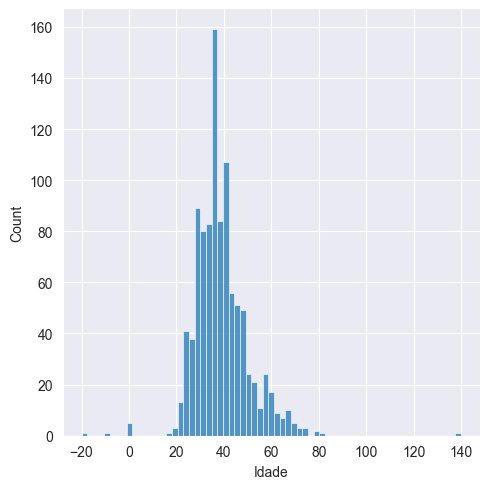

In [20]:
sns.displot(dataset['Idade']).set_titles()

In [21]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

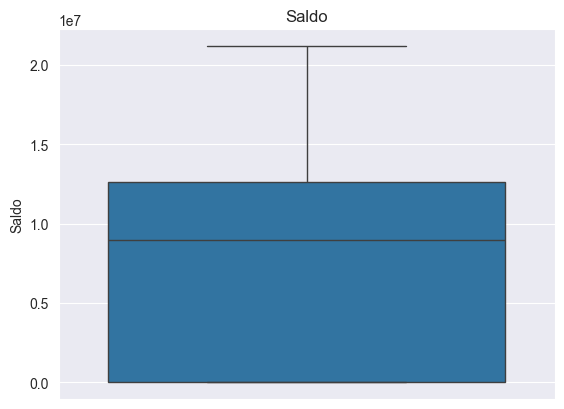

In [22]:
sns.boxplot(dataset['Saldo']).set_title('Saldo')

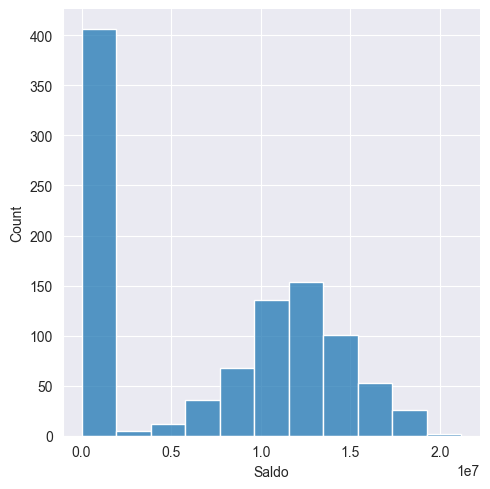

In [23]:
sns.displot(dataset['Saldo']).set_titles()

In [24]:
#salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

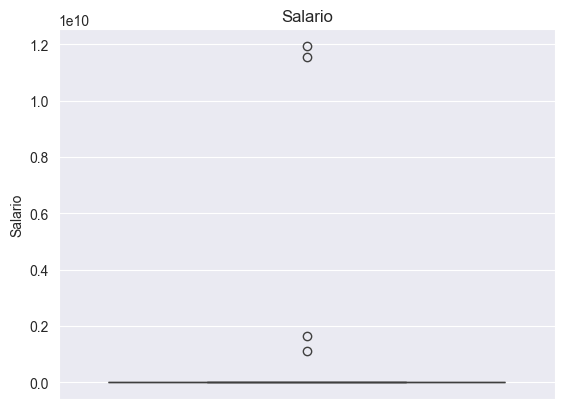

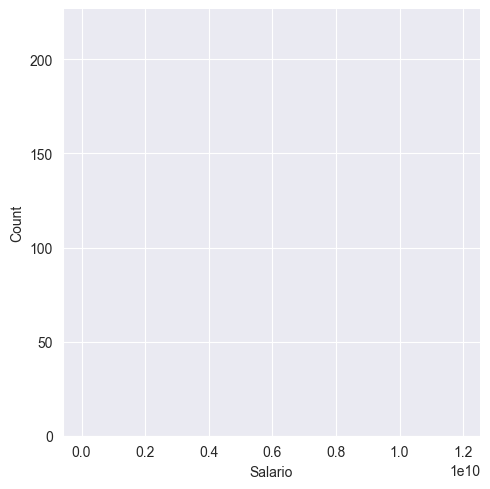

In [25]:
sns.boxplot(dataset['Salario']).set_title('Salario')
sns.displot(dataset['Salario']).set_titles()

In [26]:
#Contamos valores NAN
#Genero e salario
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [28]:
#substituir os valores 0 pela mediana
#remover e substituir por mediana 
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [29]:
mediana = stats.median(dataset['Salario'])
mediana

70518.0

In [30]:
#substituir NAN por mediana 
dataset['Salario'] = dataset['Salario'].fillna(mediana)



In [31]:
#verificar se NAN não existe maus 
dataset['Salario'].isnull().sum()

np.int64(0)

In [32]:
# Falta de padronização e NAs em genero
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [33]:
#total de NAs
dataset['Genero'].isnull().sum()


np.int64(8)

In [35]:
#preencher os NAs com Masculino (moda)
dataset['Genero'] = dataset['Genero'].fillna('Maculino')


In [36]:
#total de NAs, apos a substituição 
dataset['Genero'].isnull().sum()

np.int64(0)

In [37]:
#padronização de acordo com o dominio 
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"] == "Maculio", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"] == "Maculino", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin( ["Fem","F"]),"Genero"] = "Feminino"
#visualização do resultado 
agrupado = dataset.groupby(["Genero"]).size()
agrupado


Genero
Feminino     464
Masculino    535
dtype: int64

In [38]:
#idade fora do dominio 
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [39]:
#visualização
dataset.loc[(dataset["Idade"] < 0 ) | (dataset["Idade"] > 120),"Idade"]

867    -10
984    -20
990    140
Name: Idade, dtype: int64

In [40]:
#calocar a mediana
mediana = stats.median(dataset['Idade'])
mediana

37

In [41]:
#substituir valores
dataset.loc[(dataset['Idade'] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [42]:
#calcular a mediana
mediana = stats.median(dataset['Idade'])
mediana

37

In [43]:
#substituir
dataset.loc[(dataset['Idade'] < 0) | (dataset["Idade"] > 120),'Idade']=mediana


In [44]:
#verificamos se ainda existe idades fora do dominio
dataset.loc[(dataset['Idade'] < 0) | (dataset["Idade"] > 120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [45]:
#dados duplicamos, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]



,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [46]:
#excluindo pelo ID
dataset.drop_duplicates(subset=['Id'],keep='first',inplace=True)
#buscando duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [66]:
#estado fora do dominio 
agrupado=dataset.groupby(["Estado"]).size()
agrupado


Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [70]:
#Atribuindo RS(MODA)
dataset.loc[dataset['Estado'].isin(['SP,RP,TD']),'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [71]:
#VERIFICANDO RESULTTADO 
agrupado


Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [72]:
#outliers em salarios, vamos considerar 2 desvio padrão
desv = stats.stdev(dataset['Salario'])
desv

528988918.4679201

In [75]:
#definir oadão como maior que 2 desvios padrão
#checamos se algum atende criterios

media = dataset['Salario'].mean() 
desvio_padrao = dataset['Salario'].std() 
# Filtrando os valores maiores que 2 desvios padrão 
criterio = media + 2 * desvio_padrao 
resultado = dataset.loc[dataset['Salario'] >= criterio]
resultado

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [78]:
#mediana do salario 
mediana= stats.median(dataset['Salario'])
mediana


8637195.5

In [79]:
#atribuimo 
dataset.loc[dataset['Salario'] >= criterio,'Salario'] = mediana
#checamos se algum atende criterio
dataset.loc[dataset['Salario'] < criterio,'Salario'] = mediana

In [81]:
dataset.head()


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,8637195.5,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,8637195.5,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,8637195.5,1
3,4,699,RS,Feminino,39,1,0,2,0,0,8637195.5,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,8637195.5,0


In [82]:
dataset.shape

(998, 12)